<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

(10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 1000

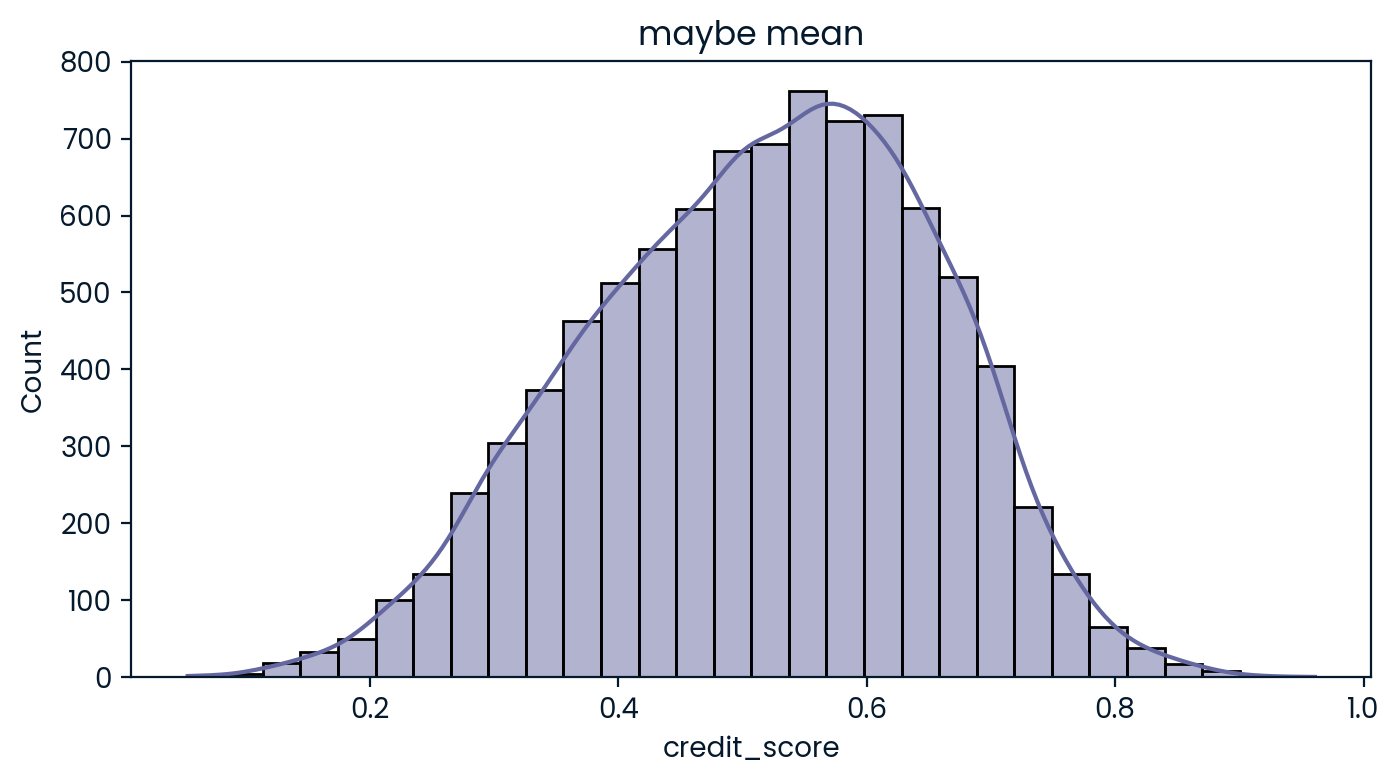

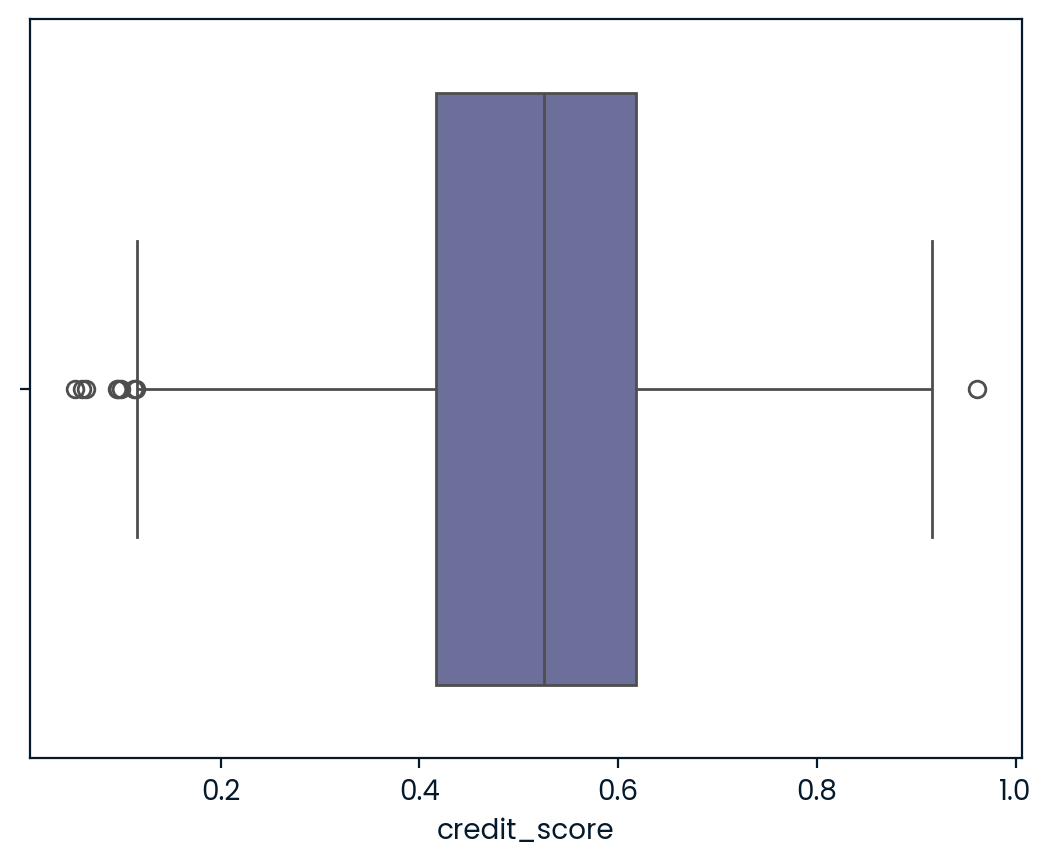

4.563594213546267e-21
Skewness 0.04018524746188894
Kurtosis -0.130177393987573
id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64
                          age    gender  ...  past_accidents   outcome
age                  1.000000  0.005929  ...        0.431061 -0.448463
gender               0.005929  1.000000  ...        0.223202  0.107208
driving_experience   0.707393  0.007511  ...        0.604699 -0.497431
education            0.153339  0.082831  ...        0.067320 -0.092643
income               0.145340  0.012226  ...        0.050460 -0.047560
credit_score         0.471419 -0

In [4]:
# Import required modules
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from statsmodels.formula.api import logit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_recall_curve
# Start coding!
df = pd.read_csv('car_insurance.csv')
print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())
# check unique values in categorical columns 
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()}") 
# to check if we use mean or median
plt.figure(figsize=(8,4))
sns.histplot(df["credit_score"],bins=30,kde=True)
plt.title("maybe mean")
plt.show()
sns.boxplot(x=df['credit_score'])
plt.show()
# check with stats if to use mean or median for null values 
stat,p = shapiro(df['credit_score'].dropna())
print(p)
print("Skewness", skew(df['annual_mileage'].dropna()))
print("Kurtosis", kurtosis(df['annual_mileage'].dropna()))
# replace by mean as per the scores
df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)
df['annual_mileage'].fillna(df['annual_mileage'].mean(), inplace=True)
print(df.isnull().sum())
# change categorical data into numerical 
# store categorical columns in a variable 
cat_cols = df.select_dtypes(include=['object']).columns
    
# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
# change float values to int 
df["children"] = df["children"].astype(int)
df["married"] = df["married"].astype(int)
df["outcome"] = df["outcome"].astype(int)
# Scale numerical features (like credit_score, annual_mileage) 
scaler = StandardScaler()
df[["credit_score", "annual_mileage"]] = scaler.fit_transform(df[["credit_score", "annual_mileage"]])
# Preparing for 
# put id column as index so that it maintains uniqueness and also doenst affect feature eng. 
df.set_index('id', inplace=True)
# Calculate correlation matrix
correlation_matrix = df.corr()
# Display the correlation matrix
print(correlation_matrix)

# Selecting Features with High Correlation to Target
target_corr = correlation_matrix['outcome'].sort_values(ascending=False)
print(target_corr)

# driving_experience as best_feature has the highest ABSOLUTE correlation 

# Step 1: Define the best feature
best_feature = "driving_experience"

# Step 2: Prepare dataset using only this feature
X = df[[best_feature]]
y = df["outcome"]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Make predictions and calculate accuracy
y_pred = model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred)

# Step 7: Store in DataFrame
best_feature_df = pd.DataFrame({
    "best_feature": [best_feature],
    "best_accuracy": [best_accuracy]
})

# Display the result
print(best_feature_df)

